<a href="https://colab.research.google.com/github/shreya0505/ComputerVisionTutorial/blob/master/ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import imutils
import cv2

**Loding and Displaying an Image**

In [0]:
image = cv2.imread("jp.png")
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))

width=600, height=322, depth=3


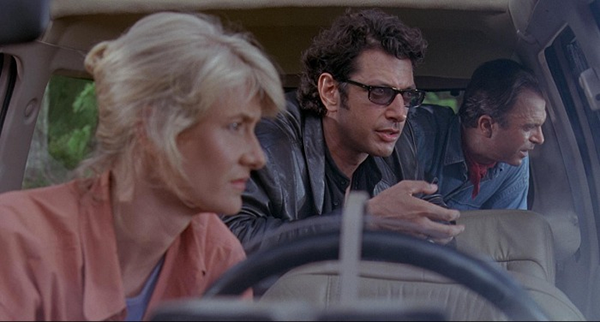

In [15]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

**Getting RGB Values at a point**

In [0]:
(B, G, R) = image[100, 50]
print("R={}, G={}, B={}".format(R, G, B))

R=41, G=49, B=37


**Cropping**

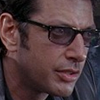

In [0]:
#region of interest
roi = image[60:160, 320:420]
cv2_imshow(roi)

**Resizing**

Resized without aspect ratio



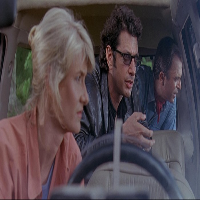


Resized according aspect ratio



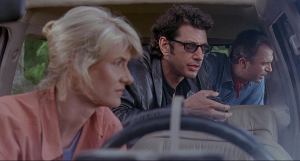

In [0]:
# resize the image to 200x200px, ignoring aspect ratio
resized = cv2.resize(image, (200, 200))
print("Resized without aspect ratio\n")
cv2_imshow(resized)
# resize the image to based on aspect ratio
r = 300.0 / w
dim = (300, int(h * r))
print("\nResized according aspect ratio\n")
resized = cv2.resize(image, dim)
cv2_imshow(resized)



**Rotate Image**

Clipped at edges



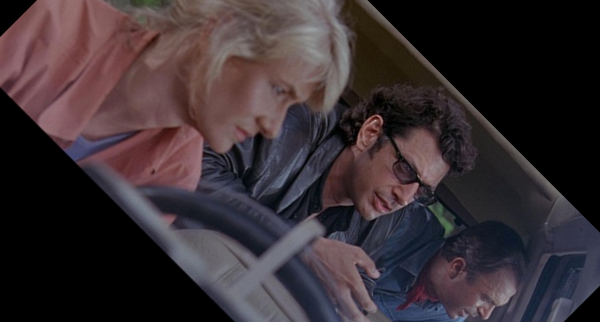


Using Image utils lib



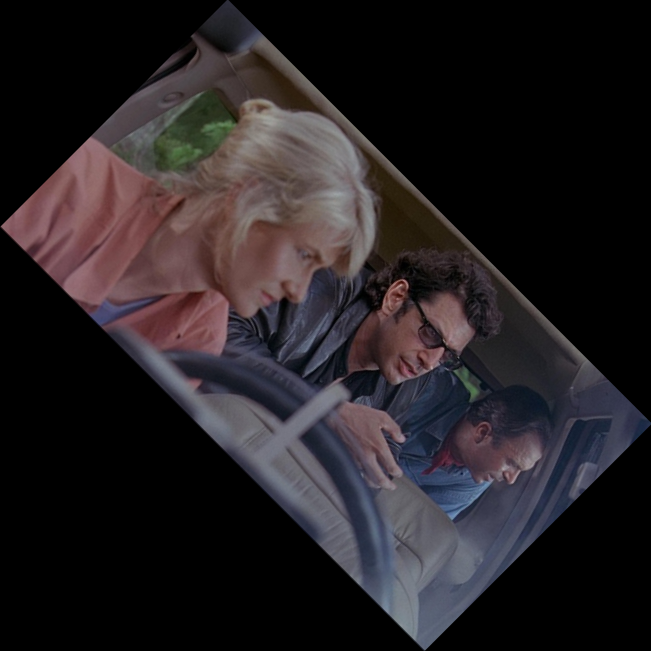

In [0]:
# compute the image center, 
# construct rotation matrix,
# apply the affine warp
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
print("Clipped at edges\n")
rotated = cv2.warpAffine(image, M, (w, h))
cv2_imshow(rotated)
print("\nUsing Image utils lib\n")
#https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/
rotated = imutils.rotate_bound(image, 45)
cv2_imshow(rotated)

**Smoothing an image**

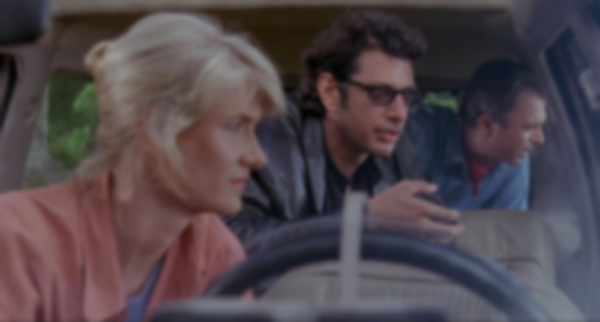

In [0]:
blurred = cv2.GaussianBlur(image, (11, 11), 0)
cv2_imshow(blurred)

**Drawing on an image**

Rectangle



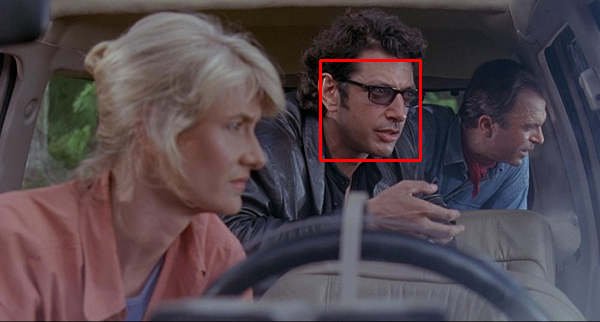


Circle



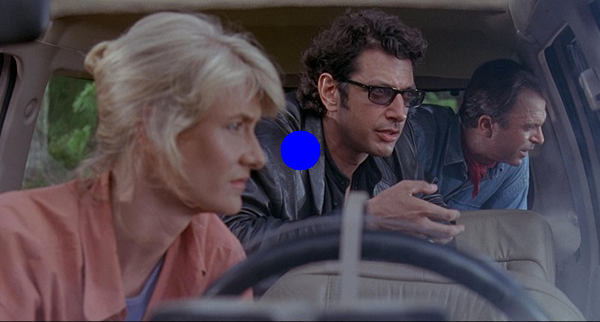


Text



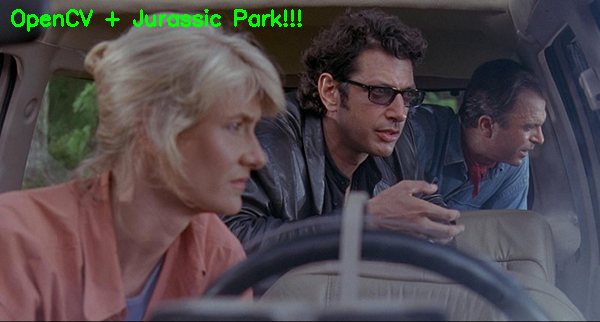

In [0]:
# top-left pixel is (320, 60) 
# bottom-right pixel is (420, 160)
# BGR tuple
# thickness
output = image.copy()
cv2.rectangle(output, (320, 60), (420, 160), (0, 0, 255), 2)
print("Rectangle\n")
cv2_imshow(output)

# center
# radius
# BGR tuple
# thickness (-1 is solid)
output = image.copy()
cv2.circle(output, (300, 150), 20, (255, 0, 0), -1)
print("\nCircle\n")
cv2_imshow(output)

# text
# Starting point
# font : https://docs.opencv.org/3.4.1/d0/de1/group__core.html#ga0f9314ea6e35f99bb23f29567fc16e11
# scale
# BGR tuple
# thickness (-1 is solid)
output = image.copy()
cv2.putText(output, "OpenCV + Jurassic Park!!!", (10, 25), 
	cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
print("\nText\n")
cv2_imshow(output)




**Counting objects**


In [0]:
image = cv2.imread("tetris_blocks.png")

**1. Convert to Grayscale**

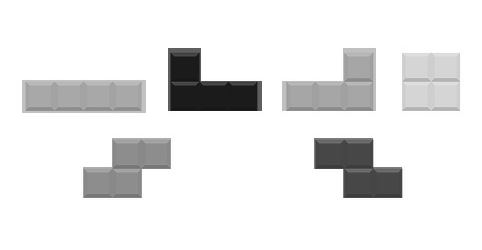

In [57]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

**2. Edge Detection** 

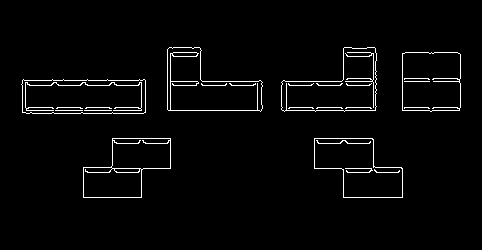

In [44]:
#Canny Edge Detection
# grayscaled image
# minVal
# maxVal
# aperture_size (default = 3)
edged = cv2.Canny(gray, 30, 150)
cv2_imshow(edged)

**` 3. Image Thresholding :`**

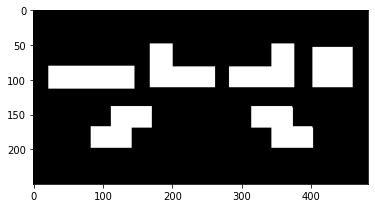

In [60]:
# pixel values less than 225 to 255 (white; foreground) 
# all pixel values >= 225 to 255 (black; background)
import matplotlib.pyplot as plt
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh,'gray')
plt.show()

  **4. Detecting and drawing contours**


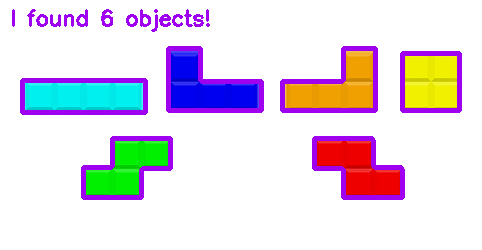

In [65]:
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

for c in cnts:
  cv2.drawContours(output, [c], -1, (240, 0, 159), 3)

text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(240, 0, 159), 2)
cv2_imshow(output)

**5. Erosions and dilations**

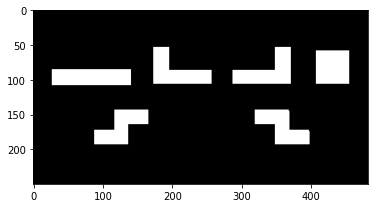

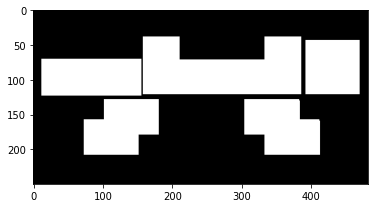

In [69]:
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)
plt.imshow(mask,'gray')
plt.show()

mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=10)
plt.imshow(mask,'gray')
plt.show()

**6. Apply Mask**

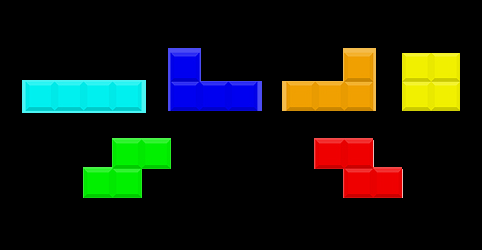

In [70]:
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(output)